### This notebook preprocess the data separately in two different ways
- Apply nonlinear transformation using RobustScaler
- Apply nonlinear transformation using QuantileTransformer: normal distribution

In [8]:
# import relevant libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import QuantileTransformer, RobustScaler
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# import data
data = pd.HDFStore("train.h5", "r").get("train")

In [3]:
# split data into test and train
train, test = train_test_split(data, test_size=0.25, random_state=0, shuffle= False)
Y_train = train.y
X_train = train.drop(['y'], axis=1)
Y_test = test.y
X_test = test.drop(['y'], axis=1)

In [4]:
# replace missing data (NaN) with median values
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
clm_names=X_train.columns
X_train=pd.DataFrame(imp.fit_transform(X_train), columns=clm_names)
X_test=pd.DataFrame(imp.transform(X_test), columns=clm_names)

In [5]:
# Transform the training and testing features using nonlinear QuantileTransformer
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution='normal')
X_train_qt_norm = pd.DataFrame(qt.fit_transform(X_train), columns=clm_names)
X_test_qt_norm=pd.DataFrame(qt.transform(X_test), columns=clm_names)

In [6]:
# Transform the training and testing features using RobustScaler
rb = RobustScaler(quantile_range=(0, 100))
X_train_rbst = pd.DataFrame(rb.fit_transform(X_train), columns=clm_names)
X_test_rbst=pd.DataFrame(rb.transform(X_test), columns=clm_names)

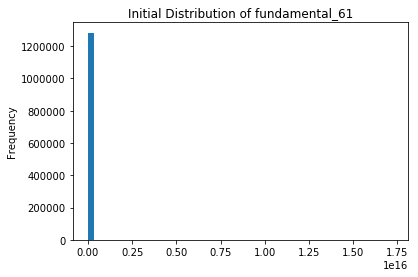

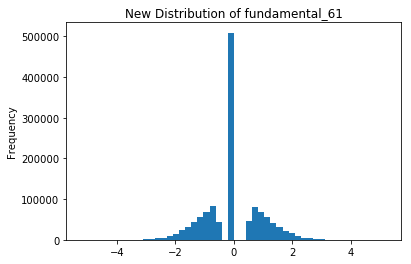

In [11]:
# Plot before and after distributions
clm='fundamental_61'
X_train[clm].plot.hist(bins=50,title= ("Initial Distribution of {}".format(clm)));
plt.figure()
X_train_qt_norm[clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

In [8]:
# Save data after transformation
data_quantile_norm={'X_train':X_train_qt_norm,'X_test':X_test_qt_norm, 'Y_train':Y_train, 'Y_test': Y_test}
output1 = open('data_qt_norm.pkl', 'wb')
pickle.dump(data_quantile_norm, output1)
output1.close()

In [10]:
# Save data after transformation
data_rbst={'X_train':X_train_rbst,'X_test':X_test_rbst, 'Y_train':Y_train, 'Y_test': Y_test}
output2 = open('data_rbst.pkl', 'wb')
pickle.dump(data_rbst, output2)
output2.close()